In [19]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

**Q1. Resize an image with varying scaling factors (e.g., 0.1x, 0.2x, 0.5x, 1.2x, 2.5x) using OpenCV. 
Evaluate the visual quality of the resized image and compare them with the original image.
Dynamic Assignment: Do it for a set of images in a folder and save the scaled images into an output 
folder.**


In [33]:
def resize_images(input_folder, output_folder, scaling_factors):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    for image_file in image_files:
        original_image_path = os.path.join(input_folder, image_file)
        original_image = cv2.imread(original_image_path)

        for scale_factor in scaling_factors:
            resized_image = cv2.resize(original_image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

            output_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_scaled_{scale_factor:.2f}.png")
            cv2.imwrite(output_path, resized_image)

            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            plt.title("Original Image")
            plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title(f"Resized Image (Scale: {scale_factor:.2f})")
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.show()

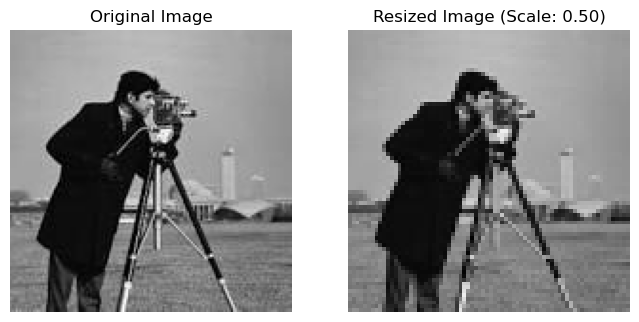

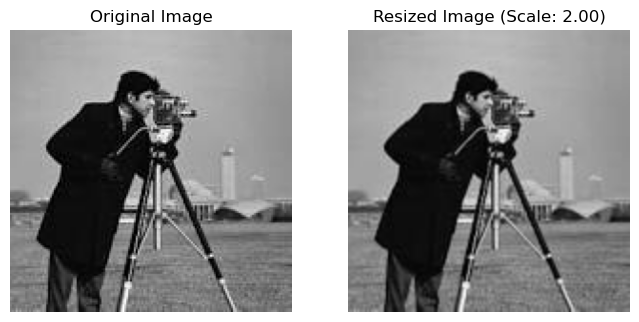

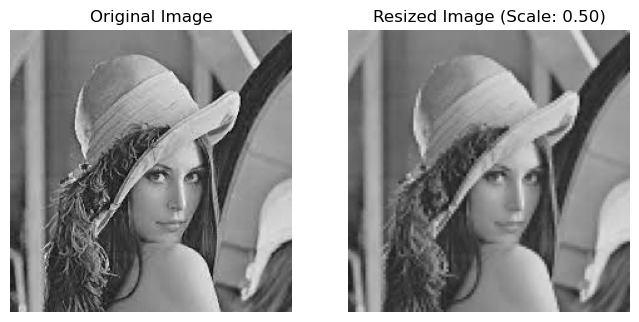

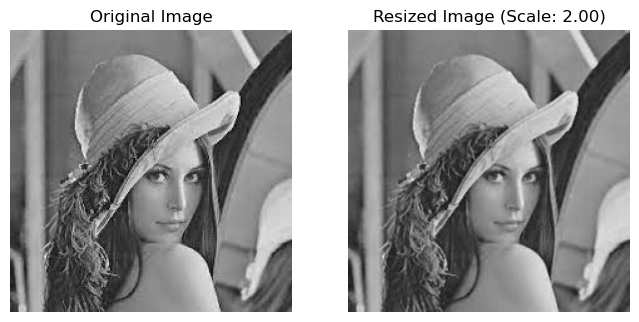

In [34]:
if __name__ == "__main__":
    input_folder = "C:/Users/ASUS/Desktop/Computer-Vision/resize_and_rotate/data"
    output_folder = "C:/Users/ASUS/Desktop/Computer-Vision/resize_and_rotate/resized"

    scaling_factors = [0.5,2.0]

    resize_images(input_folder, output_folder, scaling_factors)

**Q2. Resize an image using different interpolation methods (e.g., cv2.INTER_NEAREST, 
cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4). Measure and compare the 
processing time for each method.
Dynamic Assignment: Do it for a set of images in a folder and save the interpolated images into an 
output folder.**

In [35]:
import time

def resize_images_interpolation(input_folder, output_folder, scaling_factors):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    interpolation_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]

    for image_file in image_files:
        original_image_path = os.path.join(input_folder, image_file)
        original_image = cv2.imread(original_image_path)

        for scale_factor in scaling_factors:
            for interpolation_method in interpolation_methods:
                start_time = time.time()
                resized_image = cv2.resize(original_image, None, fx=scale_factor, fy=scale_factor, interpolation=interpolation_method)
                end_time = time.time()
                processing_time = end_time - start_time

                output_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_scaled_{scale_factor:.2f}_{interpolation_method}.png")
                cv2.imwrite(output_path, resized_image)

#                 plt.figure(figsize=(8, 4))
#                 plt.subplot(1, 2, 1)
#                 plt.title("Original Image")
#                 plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
#                 plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.title(f"Resized Image (Scale: {scale_factor:.2f}, Interpolation: {interpolation_method})\nProcessing Time: {processing_time:.4f} seconds")
                plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
                plt.axis('off')

                plt.show()

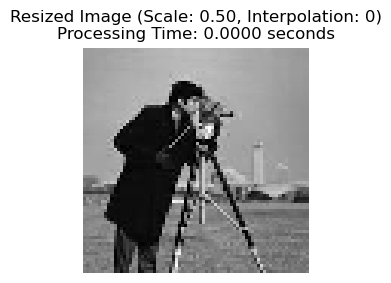

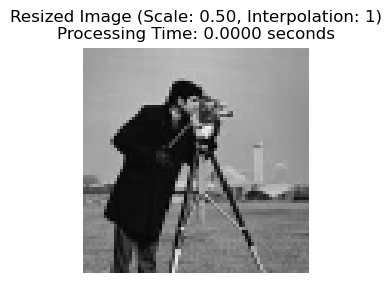

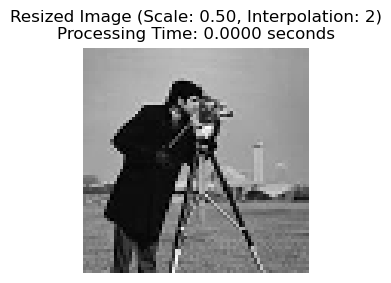

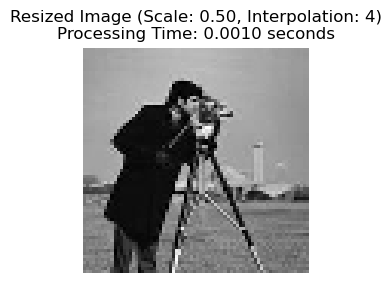

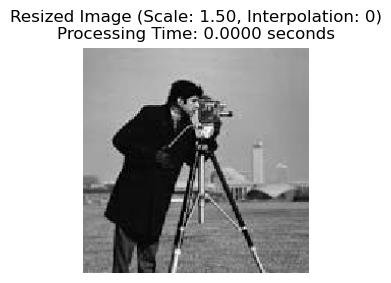

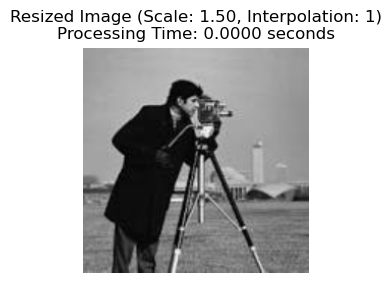

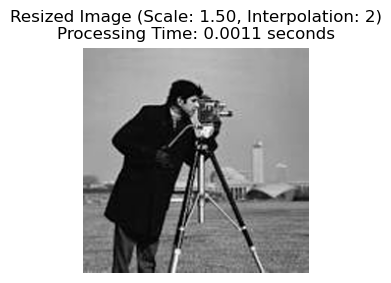

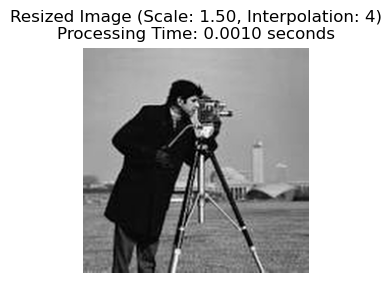

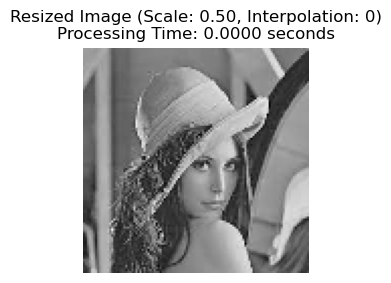

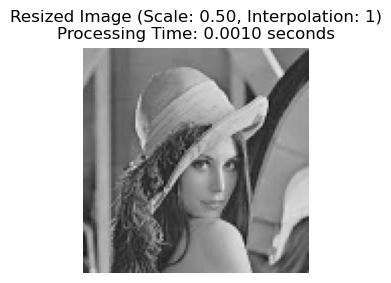

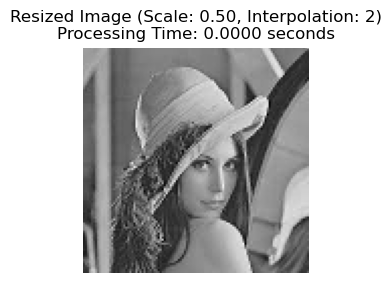

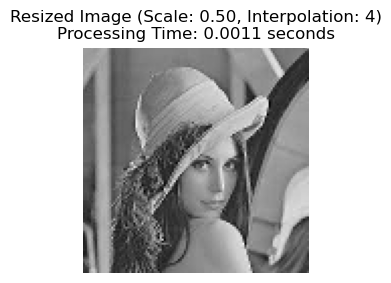

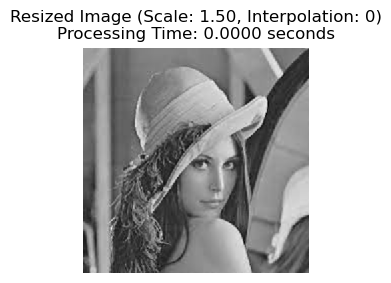

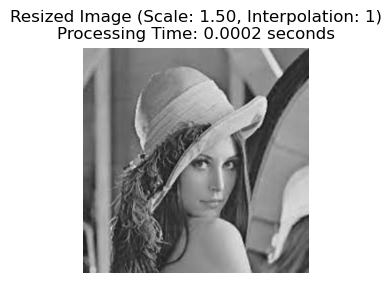

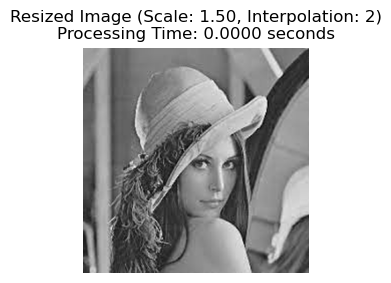

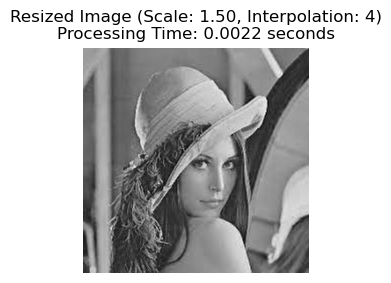

In [36]:
input_folder = "C:/Users/ASUS/Desktop/Computer-Vision/resize_and_rotate/data"
output_folder = "C:/Users/ASUS/Desktop/Computer-Vision/resize_and_rotate/interpolated"
scaling_factors = [0.5, 1.5]

resize_images_interpolation(input_folder, output_folder, scaling_factors)

**Q3. Resize images with and without preserving the aspect ratio. Evaluate the visual differences between the 
two sets of scaled images and analyse how aspect ratio preservation affects the overall perception.**

In [37]:
def resize_images(input_folder, output_folder, scaling_factors, preserve_aspect_ratio=True):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    for image_file in image_files:
        original_image_path = os.path.join(input_folder, image_file)
        original_image = cv2.imread(original_image_path)

        for scale_factor in scaling_factors:
            if preserve_aspect_ratio:
                height, width = original_image.shape[:2]
                new_width = int(scale_factor * width)
                new_height = int(scale_factor * height)
                resized_image = cv2.resize(original_image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
            else:
                resized_image = cv2.resize(original_image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

            output_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_scaled_{scale_factor:.2f}_{'preserved' if preserve_aspect_ratio else 'not_preserved'}.png")
            cv2.imwrite(output_path, resized_image)

#             plt.figure(figsize=(12, 4))
#             plt.subplot(1, 3, 1)
#             plt.title("Original Image")
#             plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
#             plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.title(f"Resized Image\n(Scale: {scale_factor:.2f})")
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.title("Comparison")
            plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB), alpha=0.5)
            plt.axis('off')

            plt.show()


**preserving aspect ratio**

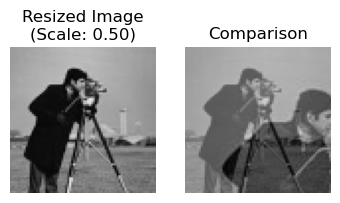

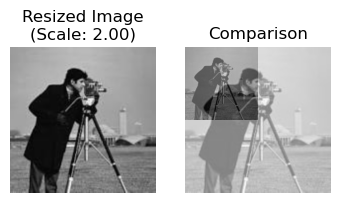

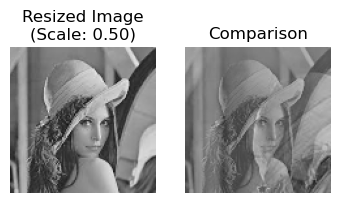

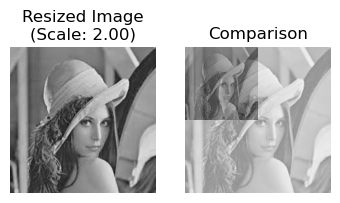

In [38]:
input_folder = "C:/Users/ASUS/Desktop/Computer-Vision/resize_and_rotate/data"
output_folder1 = "C:/Users/ASUS/Desktop/Computer-Vision/resize_and_rotate/resize_with_aspectratio"
output_folder2 = "C:/Users/ASUS/Desktop/Computer-Vision/resize_and_rotate/resize_without_aspectratio"
scaling_factors = [0.5, 2]

resize_images(input_folder, output_folder1, scaling_factors, preserve_aspect_ratio=True)


**without preserving aspect ratio**

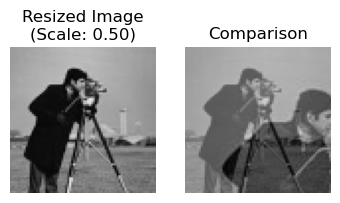

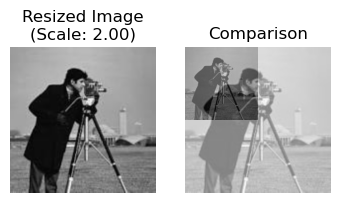

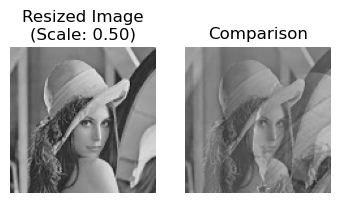

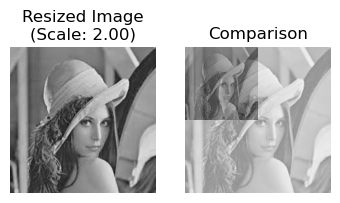

In [39]:
resize_images(input_folder, output_folder2, scaling_factors, preserve_aspect_ratio=False)

**Q4. Rotate a given image at different angles (e.g., 30 degrees, 60 degrees, 90 degrees) using OpenCV. Assess the visual quality and potential loss of information. Compare the results to determine the optimal rotation angle for minimal distortion. 
Dynamic Assignment: Do it for a set of images in a folder and save the rotated images into an output folder.**

In [40]:
def rotate_image(image, angle):
     rows, cols = image.shape[:2]
     center = tuple(np.array(image.shape[1::-1]) / 2)
     rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
     rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
     return rotated_image

In [41]:
def rotate_all(input_folder, output_folder, angles):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    for image_file in image_files:
        original_image_path = os.path.join(input_folder, image_file)
        original_image = cv2.imread(original_image_path)

        for angle in angles:
            rotated_img = rotate_image(original_image, angle)

            output_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_scaled_{angle:.2f}.png")
            cv2.imwrite(output_path, rotated_img)

#             plt.figure(figsize=(8, 4))
#             plt.subplot(1, 2, 1)
#             plt.title("Original Image")
#             plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
#             plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title(f"Rotated Image (Scale: {angle:.2f})")
            plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.show()

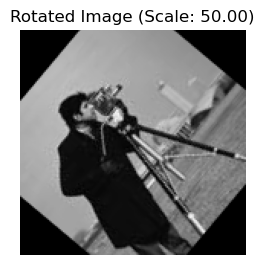

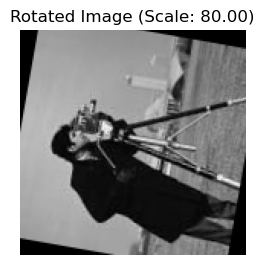

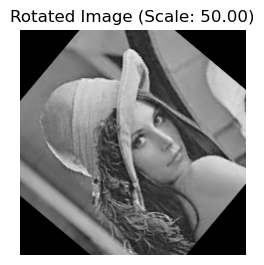

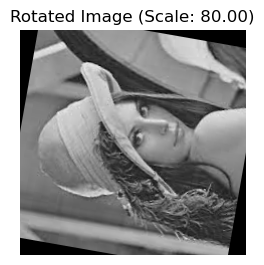

In [42]:
input_folder = "C:/Users/ASUS/Desktop/Computer-Vision/resize_and_rotate/data"
output_folder = "C:/Users/ASUS/Desktop/Computer-Vision/resize_and_rotate/rotated"

angles = [50,80]

rotate_all(input_folder, output_folder, angles)

**Q5. Develop a Python program using OpenCV that allows users to input a rotation angle interactively. 
Rotate the image in real-time based on user input, providing immediate visual feedback.
Dynamic Assignment: Do it for a set of images in a folder and save the rotated images into an output 
folder.**

In [43]:
def rotate_all_realtime(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    for image_file in image_files:
        original_image_path = os.path.join(input_folder, image_file)
        original_image = cv2.imread(original_image_path)

        angle = float(input("Enter rotation angle: "))

        rotated_img = rotate_image(original_image, angle)

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title(f"Rotated Image (Angle: {angle:.2f})")
        plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.show()

            

        output_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_rotated_{angle:.2f}.png")
        cv2.imwrite(output_path, rotated_img)

Enter rotation angle: 70


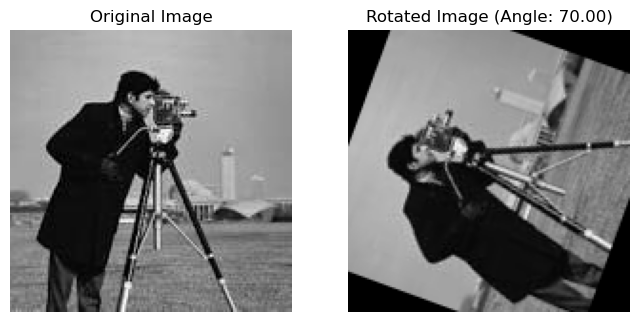

Enter rotation angle: 50


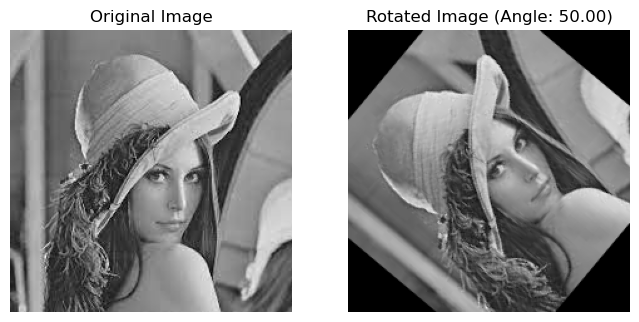

In [45]:
input_folder = "C:/Users/ASUS/Desktop/Computer-Vision/resize_and_rotate/data"
output_folder = "C:/Users/ASUS/Desktop/Computer-Vision/resize_and_rotate/rotate_Realtime"
rotate_all_realtime(input_folder, output_folder)